In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
maestro_extracted_features = pd.read_csv("maestro_initial_extracted_data.csv")

In [3]:
maestro_extracted_features.rename( columns={'Unnamed: 0':"midi_filename"}, inplace=True )


path_head = len("/Users/aybukeekiz/Desktop/maestro-v3.0.0")
def edit_path(path):
    path = path[path_head+1:]
    return path
    
    
maestro_extracted_features["midi_filename"] = maestro_extracted_features["midi_filename"].apply(edit_path)


In [4]:
maestro_metadata = pd.read_csv("maestro-v3.0.0 (1).csv")

In [5]:
combined = pd.merge(maestro_metadata, maestro_extracted_features, on = "midi_filename")

In [6]:
selected_composers = combined[combined["canonical_composer"].isin(["Franz Liszt", "Franz Schubert", "Frédéric Chopin", "Johann Sebastian Bach", "Ludwig van Beethoven"])]


In [7]:
selected_composers.groupby("canonical_composer").describe()

year                                                 \
                       count         mean       std     min     25%     50%   
canonical_composer                                                            
Franz Liszt            131.0  2011.595420  3.902225  2004.0  2008.0  2011.0   
Franz Schubert         186.0  2009.940860  4.560909  2004.0  2006.0  2009.0   
Frédéric Chopin        201.0  2012.084577  3.867533  2004.0  2009.0  2013.0   
Johann Sebastian Bach  145.0  2012.710345  3.639897  2004.0  2011.0  2013.0   
Ludwig van Beethoven   146.0  2012.410959  4.321033  2004.0  2009.0  2013.0   

                                      duration              ...  \
                          75%     max    count        mean  ...   
canonical_composer                                          ...   
Franz Liszt            2015.0  2018.0    131.0  556.936938  ...   
Franz Schubert         2014.0  2018.0    186.0  693.326351  ...   
Frédéric Chopin        2015.0  2018.0    201.0  469.597049  ...   
Johann Sebastian Bach  2015.0  2018.0    145.0  341.793086  ...   
Ludwig van Beethoven   2017.0  2018.0    146.0  663.853992  ...   

                      Rhythmic_Variability_-_Tempo_Standardized            \
                                                            75%       max   
canonical_composer                                                          
Franz Liszt                                            0.006513  0.006985   
Franz Schubert                                         0.006718  0.009388   
Frédéric Chopin                                        0.006492  0.007461   
Johann Sebastian Bach                                  0.008479  0.014780   
Ludwig van Beethoven                                   0.006660  0.008136   

                      Rhythmic_Variability                                \
                                     count      mean       std       min   
canonical_composer                                                         
Franz Liszt                          131.0  0.006436  0.000141  0.006071   
Franz Schubert                       186.0  0.006618  0.000389  0.006017   
Frédéric Chopin                      201.0  0.006434  0.000196  0.005624   
Johann Sebastian Bach                145.0  0.007925  0.001318  0.006481   
Ludwig van Beethoven                 146.0  0.006584  0.000219  0.006177   

                                                               
                            25%       50%       75%       max  
canonical_composer                                             
Franz Liszt            0.006356  0.006446  0.006513  0.006985  
Franz Schubert         0.006429  0.006527  0.006718  0.009388  
Frédéric Chopin        0.006348  0.006419  0.006492  0.007461  
Johann Sebastian Bach  0.006991  0.007514  0.008479  0.014780  
Ludwig van Beethoven   0.006464  0.006552  0.006660  0.008136  

[5 rows x 280 columns]

In [8]:
selected_composers.head()

,canonical_composer,canonical_title,split,year,midi_filename,audio_filename,duration,Prevalence_of_Most_Common_Pitch,Prevalence_of_Most_Common_Pitch_Class,Relative_Prevalence_of_Top_Pitches,...,Prevalence_of_Short_Rhythmic_Values,Prevalence_of_Medium_Rhythmic_Values,Prevalence_of_Long_Rhythmic_Values,Prevalence_of_Very_Long_Rhythmic_Values,Prevalence_of_Most_Common_Rhythmic_Value,Relative_Prevalence_of_Most_Common_Rhythmic_Values,Rhythmic_Value_Variability,Variability_in_Rhythmic_Value_Run_Lengths,Rhythmic_Variability_-_Tempo_Standardized,Rhythmic_Variability
156,Franz Liszt,"""La Campanella""",train,2008,2008/MIDI-Unprocessed_09_R1_2008_01-05_ORIG_MI...,2008/MIDI-Unprocessed_09_R1_2008_01-05_ORIG_MI...,273.162120,0.08896,0.2940,0.8492,...,0.9918,0.017420,0.000706,0.000000,0.9167,1.0,0.09927,30.050,0.006575,0.006575
157,Franz Liszt,"""La Campanella""",train,2008,2008/MIDI-Unprocessed_10_R1_2008_01-04_ORIG_MI...,2008/MIDI-Unprocessed_10_R1_2008_01-04_ORIG_MI...,265.471155,0.09049,0.2896,0.8075,...,0.9935,0.018150,0.000968,0.000484,0.8718,1.0,0.20940,15.970,0.006569,0.006569
158,Franz Liszt,"""La Campanella""",train,2008,2008/MIDI-Unprocessed_18_R1_2008_01-04_ORIG_MI...,2008/MIDI-Unprocessed_18_R1_2008_01-04_ORIG_MI...,269.971685,0.08692,0.2782,0.7817,...,0.9971,0.009486,0.001765,0.000000,0.9241,1.0,0.17010,21.290,0.006641,0.006641
159,Franz Liszt,Annes de Pelerinage III: Le jeux d'eau a la Vi...,train,2011,2011/MIDI-Unprocessed_17_R2_2011_MID--AUDIO_R2...,2011/MIDI-Unprocessed_17_R2_2011_MID--AUDIO_R2...,428.272809,0.06051,0.1459,0.8599,...,0.8996,0.148600,0.028260,0.002327,0.6403,1.0,0.57590,3.836,0.006281,0.006281
160,Franz Liszt,Après une lecture de Dante: Fantasia quasi Son...,train,2014,2014/MIDI-UNPROCESSED_09-10_R1_2014_MID--AUDIO...,2014/MIDI-UNPROCESSED_09-10_R1_2014_MID--AUDIO...,1027.349400,0.02698,0.1271,0.9765,...,0.9339,0.112100,0.019600,0.004285,0.6998,1.0,0.66760,6.231,0.006340,0.006340


In [9]:
processed = selected_composers.drop_duplicates(subset = ["canonical_composer", "canonical_title"])
processed

,canonical_composer,canonical_title,split,year,midi_filename,audio_filename,duration,Prevalence_of_Most_Common_Pitch,Prevalence_of_Most_Common_Pitch_Class,Relative_Prevalence_of_Top_Pitches,...,Prevalence_of_Short_Rhythmic_Values,Prevalence_of_Medium_Rhythmic_Values,Prevalence_of_Long_Rhythmic_Values,Prevalence_of_Very_Long_Rhythmic_Values,Prevalence_of_Most_Common_Rhythmic_Value,Relative_Prevalence_of_Most_Common_Rhythmic_Values,Rhythmic_Value_Variability,Variability_in_Rhythmic_Value_Run_Lengths,Rhythmic_Variability_-_Tempo_Standardized,Rhythmic_Variability
156,Franz Liszt,"""La Campanella""",train,2008,2008/MIDI-Unprocessed_09_R1_2008_01-05_ORIG_MI...,2008/MIDI-Unprocessed_09_R1_2008_01-05_ORIG_MI...,273.162120,0.08896,0.2940,0.8492,...,0.9918,0.01742,0.000706,0.000000,0.9167,1.0,0.09927,30.050,0.006575,0.006575
159,Franz Liszt,Annes de Pelerinage III: Le jeux d'eau a la Vi...,train,2011,2011/MIDI-Unprocessed_17_R2_2011_MID--AUDIO_R2...,2011/MIDI-Unprocessed_17_R2_2011_MID--AUDIO_R2...,428.272809,0.06051,0.1459,0.8599,...,0.8996,0.14860,0.028260,0.002327,0.6403,1.0,0.57590,3.836,0.006281,0.006281
160,Franz Liszt,Après une lecture de Dante: Fantasia quasi Son...,train,2014,2014/MIDI-UNPROCESSED_09-10_R1_2014_MID--AUDIO...,2014/MIDI-UNPROCESSED_09-10_R1_2014_MID--AUDIO...,1027.349400,0.02698,0.1271,0.9765,...,0.9339,0.11210,0.019600,0.004285,0.6998,1.0,0.66760,6.231,0.006340,0.006340
161,Franz Liszt,Aprés une lecture de Dante: Fantasia quasi Son...,train,2014,2014/MIDI-UNPROCESSED_04-08-12_R3_2014_MID--AU...,2014/MIDI-UNPROCESSED_04-08-12_R3_2014_MID--AU...,997.267966,0.02818,0.1281,0.9859,...,0.8940,0.16400,0.028020,0.006588,0.6160,1.0,0.73590,5.471,0.006353,0.006353
162,Franz Liszt,Au bord d'une source,test,2013,2013/ORIG-MIDI_02_7_6_13_Group__MID--AUDIO_08_...,2013/ORIG-MIDI_02_7_6_13_Group__MID--AUDIO_08_...,219.655229,0.06853,0.1801,0.8272,...,0.8938,0.19910,0.012200,0.001794,0.5569,1.0,0.58820,4.095,0.006469,0.006469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061,Ludwig van Beethoven,"Thirty-Two Variations in C Minor, WoO 80",train,2015,2015/MIDI-Unprocessed_R2_D2-19-21-22_mid--AUDI...,2015/MIDI-Unprocessed_R2_D2-19-21-22_mid--AUDI...,649.673958,0.05075,0.1837,0.9603,...,0.8827,0.22540,0.027390,0.000537,0.4360,1.0,0.50470,3.703,0.006540,0.006540
1062,Ludwig van Beethoven,"Thirty-Two Variations in C Minor, WoO 80",train,2008,2008/MIDI-Unprocessed_02_R3_2008_01-03_ORIG_MI...,2008/MIDI-Unprocessed_02_R3_2008_01-03_ORIG_MI...,544.017885,0.05179,0.1860,0.9496,...,0.9442,0.11140,0.014560,0.000000,0.6917,1.0,0.33070,7.556,0.006561,0.006561
1080,Ludwig van Beethoven,"Thirty-Two Variations in C minor, WoO 80",train,2013,2013/ORIG-MIDI_02_7_10_13_Group_MID--AUDIO_14_...,2013/ORIG-MIDI_02_7_10_13_Group_MID--AUDIO_14_...,590.600371,0.05098,0.1843,0.9576,...,0.8951,0.16740,0.019340,0.000271,0.6003,1.0,0.44100,6.651,0.006543,0.006543
1081,Ludwig van Beethoven,"Thirty-Two Variations in C minor, WoO 80",train,2015,2015/MIDI-Unprocessed_R2_D1-2-3-6-7-8-11_mid--...,2015/MIDI-Unprocessed_R2_D1-2-3-6-7-8-11_mid--...,658.187500,0.05020,0.1864,0.9676,...,0.8711,0.19950,0.031480,0.002578,0.4536,1.0,0.58760,3.262,0.006455,0.006455


In [10]:
processed = processed.drop(["year", "midi_filename","audio_filename","duration","canonical_title","split"],axis=1)

In [11]:
processed.groupby("canonical_composer").describe()

Prevalence_of_Most_Common_Pitch                      \
                                                count      mean       std   
canonical_composer                                                          
Franz Liszt                                      91.0  0.047081  0.015771   
Franz Schubert                                   96.0  0.068390  0.022009   
Frédéric Chopin                                 107.0  0.061352  0.029516   
Johann Sebastian Bach                            93.0  0.067642  0.007782   
Ludwig van Beethoven                             95.0  0.058461  0.012992   

                                                                      \
                           min       25%       50%      75%      max   
canonical_composer                                                     
Franz Liszt            0.02698  0.037215  0.043190  0.04906  0.10130   
Franz Schubert         0.03516  0.053655  0.060385  0.07674  0.12620   
Frédéric Chopin        0.03485  0.044380  0.054300  0.06790  0.28510   
Johann Sebastian Bach  0.03598  0.063620  0.067010  0.07155  0.08981   
Ludwig van Beethoven   0.03145  0.050105  0.056610  0.06609  0.09862   

                      Prevalence_of_Most_Common_Pitch_Class            ...  \
                                                      count      mean  ...   
canonical_composer                                                     ...   
Franz Liszt                                            91.0  0.156073  ...   
Franz Schubert                                         96.0  0.171121  ...   
Frédéric Chopin                                       107.0  0.169569  ...   
Johann Sebastian Bach                                  93.0  0.157653  ...   
Ludwig van Beethoven                                   95.0  0.174817  ...   

                      Rhythmic_Variability_-_Tempo_Standardized            \
                                                            75%       max   
canonical_composer                                                          
Franz Liszt                                            0.006499  0.006784   
Franz Schubert                                         0.006743  0.008462   
Frédéric Chopin                                        0.006509  0.007461   
Johann Sebastian Bach                                  0.008132  0.011960   
Ludwig van Beethoven                                   0.006685  0.008136   

                      Rhythmic_Variability                                \
                                     count      mean       std       min   
canonical_composer                                                         
Franz Liszt                           91.0  0.006416  0.000130  0.006071   
Franz Schubert                        96.0  0.006636  0.000358  0.006017   
Frédéric Chopin                      107.0  0.006438  0.000243  0.005624   
Johann Sebastian Bach                 93.0  0.007786  0.001044  0.006481   
Ludwig van Beethoven                  95.0  0.006592  0.000233  0.006177   

                                                               
                            25%       50%       75%       max  
canonical_composer                                             
Franz Liszt            0.006327  0.006433  0.006499  0.006784  
Franz Schubert         0.006475  0.006559  0.006743  0.008462  
Frédéric Chopin        0.006332  0.006410  0.006509  0.007461  
Johann Sebastian Bach  0.007026  0.007505  0.008132  0.011960  
Ludwig van Beethoven   0.006459  0.006565  0.006685  0.008136  

[5 rows x 264 columns]

In [12]:
liszt = processed[processed["canonical_composer"].isin(["Franz Liszt"])]
schubert = processed[processed["canonical_composer"].isin(["Franz Schubert"])]
chopin = processed[processed["canonical_composer"].isin(["Frédéric Chopin"])]
bach = processed[processed["canonical_composer"].isin(["Johann Sebastian Bach"])]
beethoven = processed[processed["canonical_composer"].isin(["Ludwig van Beethoven"])]


In [13]:
liszt_train = liszt.sample(n=70,random_state=1)
schubert_train = schubert.sample(n=70,random_state=1)
chopin_train = chopin.sample(n=70,random_state=1)
bach_train = bach.sample(n=70,random_state=1)
beethoven_train = beethoven.sample(n=70,random_state=1)

In [14]:
liszt = pd.concat([liszt,liszt_train]).drop_duplicates(keep=False)
schubert = pd.concat([schubert,schubert_train]).drop_duplicates(keep=False)
chopin = pd.concat([chopin,chopin_train]).drop_duplicates(keep=False)
bach = pd.concat([bach,bach_train]).drop_duplicates(keep=False)
beethoven = pd.concat([beethoven,beethoven_train]).drop_duplicates(keep=False)



In [15]:
liszt_validation = liszt.sample(n=15,random_state=1)
schubert_validation = schubert.sample(n=15,random_state=1)
chopin_validation = chopin.sample(n=15,random_state=1)
bach_validation = bach.sample(n=15,random_state=1)
beethoven_validation = beethoven.sample(n=15,random_state=1)

liszt_test = pd.concat([liszt,liszt_validation]).drop_duplicates(keep=False)
schubert_test = pd.concat([schubert,schubert_validation]).drop_duplicates(keep=False)
chopin_test = pd.concat([chopin,chopin_validation]).drop_duplicates(keep=False)
bach_test = pd.concat([bach,bach_validation]).drop_duplicates(keep=False)
beethoven_test = pd.concat([beethoven,beethoven_validation]).drop_duplicates(keep=False)



In [16]:
train = pd.concat([liszt_train, schubert_train, chopin_train, bach_train, beethoven_train])
validation = pd.concat([liszt_validation, schubert_validation, chopin_validation, bach_validation, beethoven_validation])
test = pd.concat([liszt_test, schubert_test, chopin_test, bach_test, beethoven_test])


In [17]:
train["canonical_composer"].replace({"Franz Liszt": 1, "Franz Schubert": 2, "Frédéric Chopin": 3, "Johann Sebastian Bach": 4, "Ludwig van Beethoven": 5},inplace=True)




canonical_composer                                   1.000000
Variability_in_Rhythmic_Value_Run_Lengths            0.428105
Pitch_Variability                                    0.427543
Melodic_Octaves                                      0.413392
Prevalence_of_Most_Common_Rhythmic_Value             0.378055
Stepwise_Motion                                      0.343474
Average_Interval_Spanned_by_Melodic_Arcs             0.336364
Rhythmic_Variability_-_Tempo_Standardized            0.299796
Rhythmic_Variability                                 0.299761
Distance_Between_Most_Prevalent_Melodic_Intervals    0.283782
Rhythmic_Value_Variability                           0.278319
Name: canonical_composer, dtype: float64


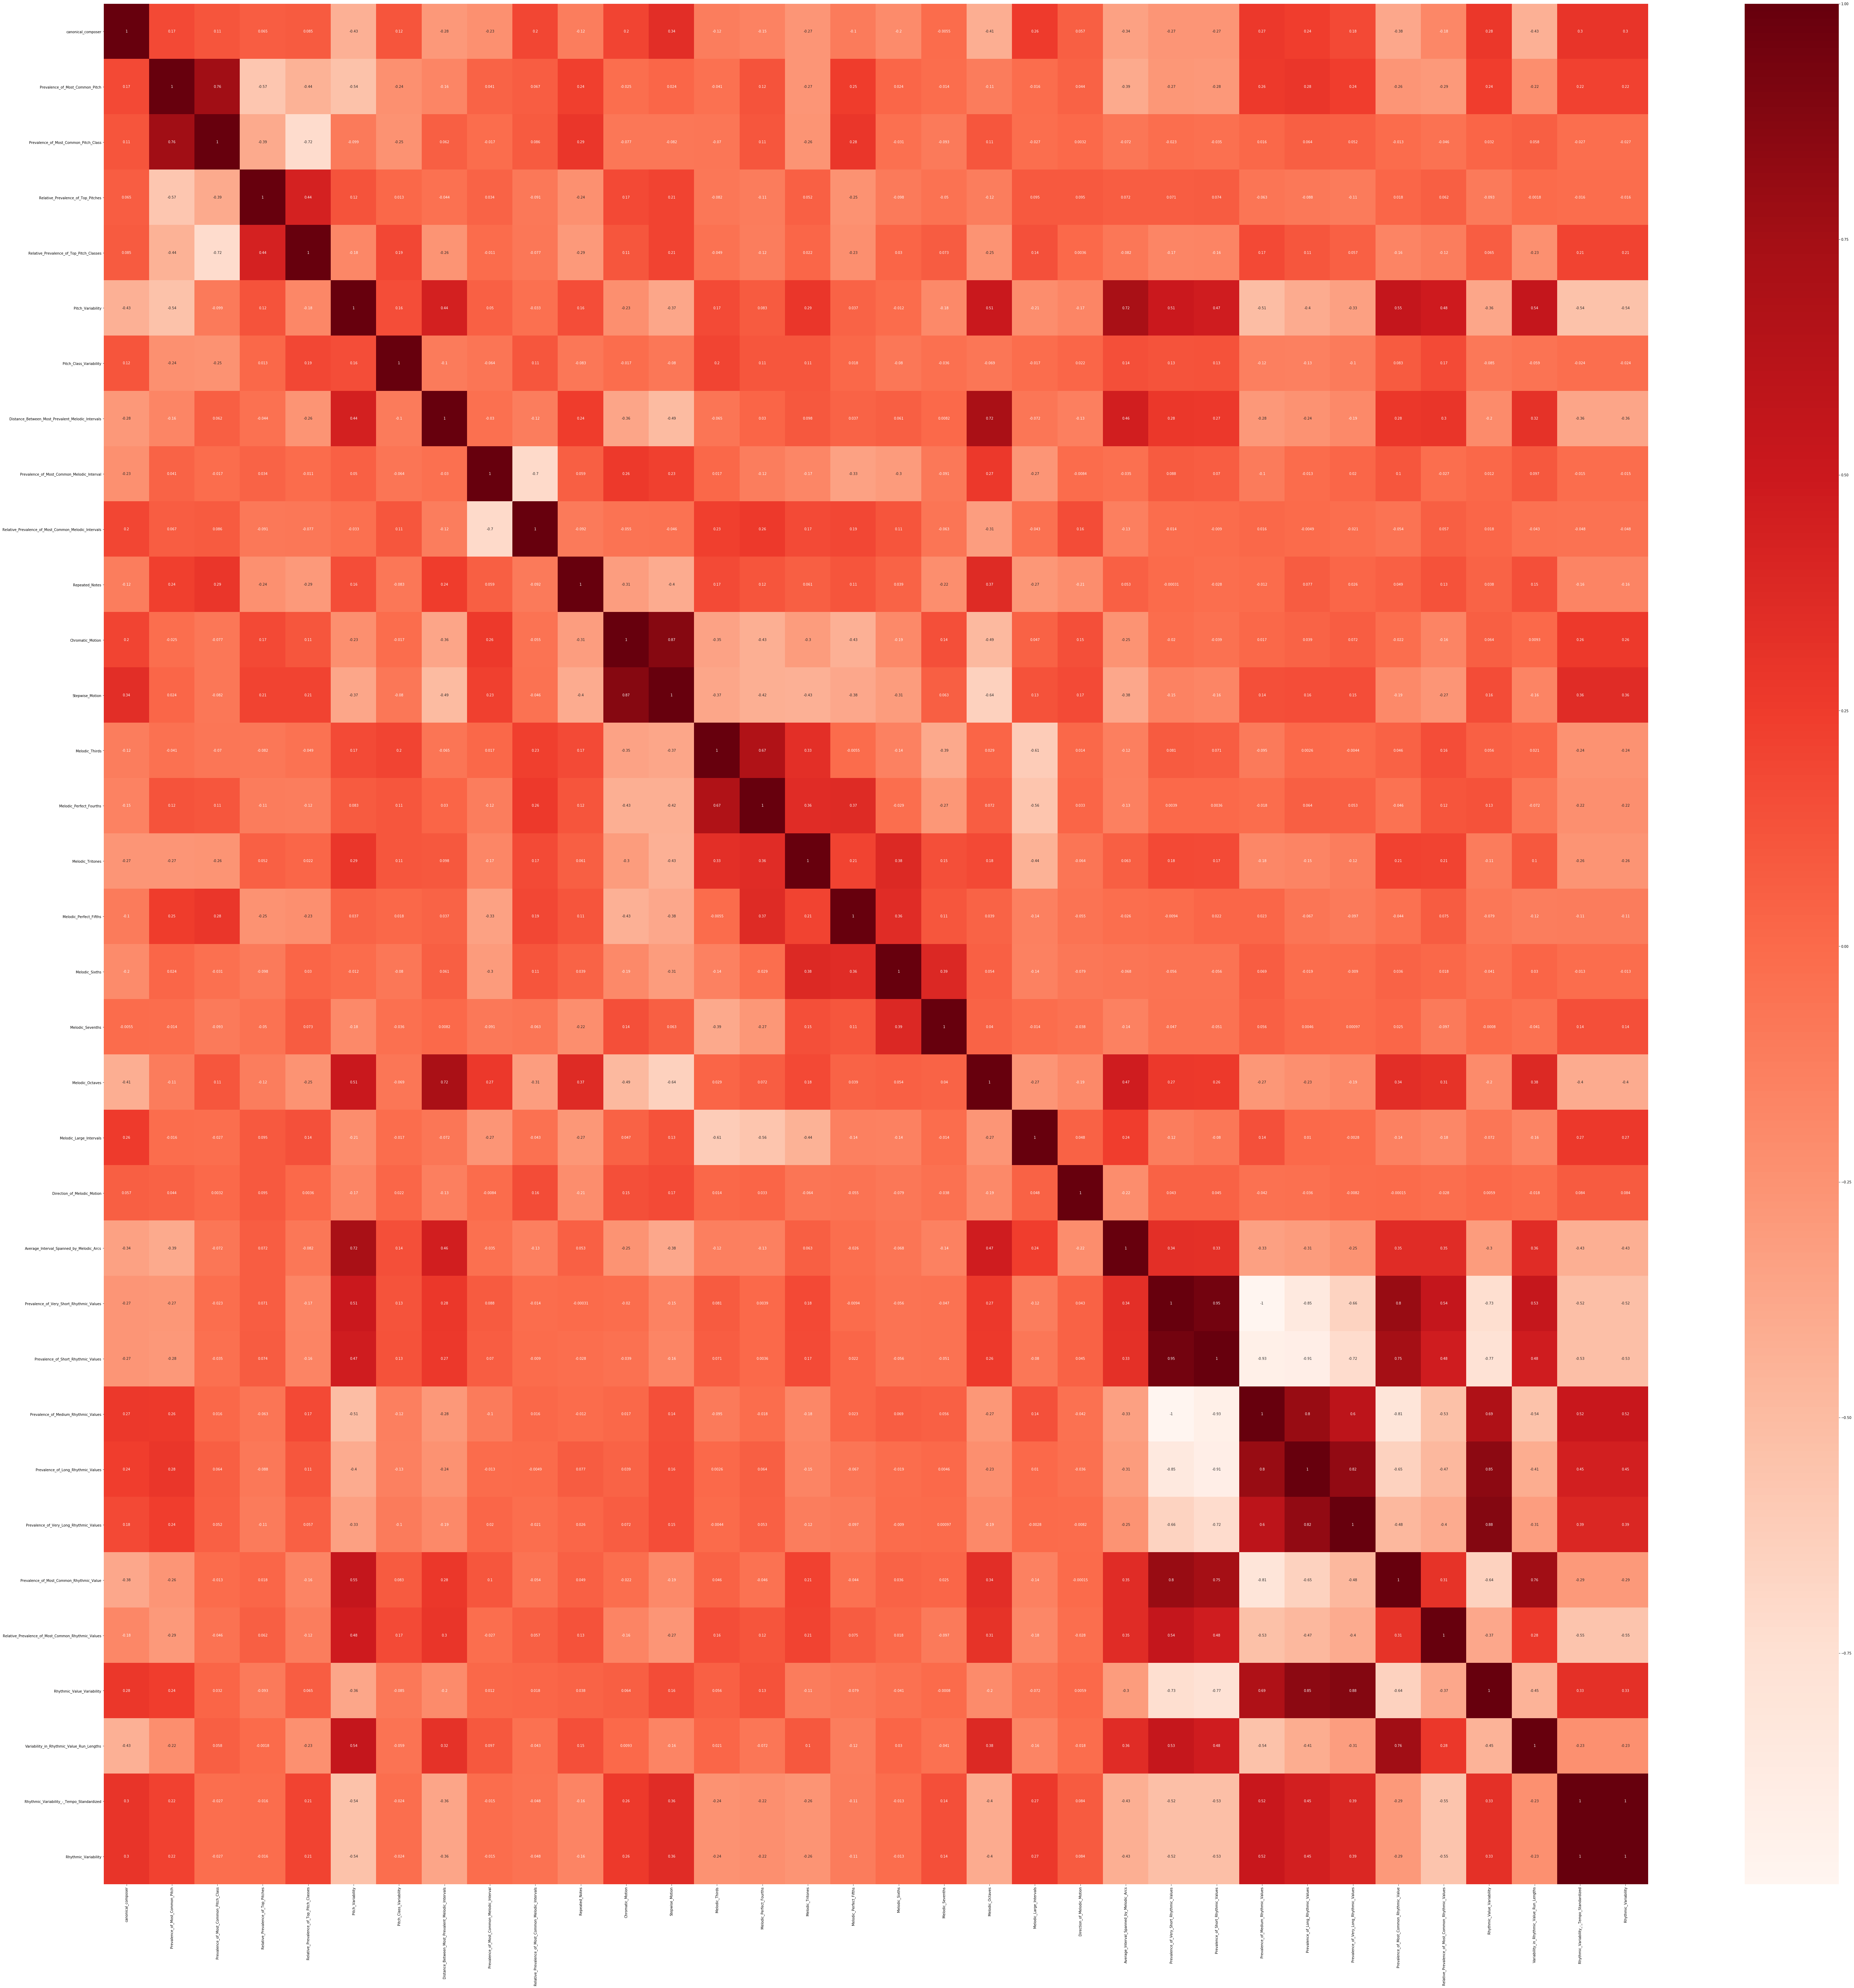

In [18]:
plt.figure(figsize=(100,100))

cor = train.corr()
cor_target = abs(cor["canonical_composer"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.20]
print(relevant_features.sort_values(ascending=False)[:11])

sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
#plt.show()


In [19]:
train["canonical_composer"].replace({1:"Franz Liszt", 2:"Franz Schubert", 3:"Frédéric Chopin", 4:"Johann Sebastian Bach", 5:"Ludwig van Beethoven"},inplace=True)


relevant_features_train = train[["canonical_composer",'Pitch_Variability','Stepwise_Motion',"Melodic_Octaves","Variability_in_Rhythmic_Value_Run_Lengths","Rhythmic_Variability_-_Tempo_Standardized","Rhythmic_Variability"]]
relevant_features_validation = validation[["canonical_composer",'Pitch_Variability','Stepwise_Motion',"Melodic_Octaves","Variability_in_Rhythmic_Value_Run_Lengths","Rhythmic_Variability_-_Tempo_Standardized","Rhythmic_Variability"]]
relevant_features_test = test[["canonical_composer",'Pitch_Variability','Stepwise_Motion',"Melodic_Octaves","Variability_in_Rhythmic_Value_Run_Lengths","Rhythmic_Variability_-_Tempo_Standardized","Rhythmic_Variability"]]


In [20]:
X_train = relevant_features_train.drop("canonical_composer",axis=1)
y_train = relevant_features_train["canonical_composer"]



In [21]:
X_validation = relevant_features_validation.drop("canonical_composer",axis=1)
y_validation = relevant_features_validation["canonical_composer"]

X_test = relevant_features_test.drop("canonical_composer",axis=1)
y_test = relevant_features_test["canonical_composer"]

0.7771428571428571
0.6266666666666667
{'algorithm': 'auto', 'leaf_size': 5, 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}


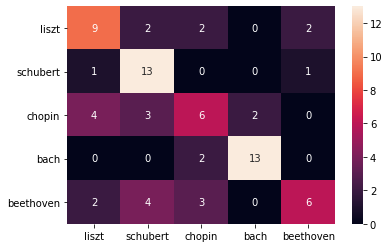

In [22]:
#K-neighbours classifier
neigh = KNeighborsClassifier(n_neighbors=3, p=1, leaf_size=5, algorithm = "auto")
neigh.fit(X_train, y_train)
predictions_train = neigh.predict(X_train)
accuracy = accuracy_score(predictions_train, y_train)
print(accuracy)

predictions = neigh.predict(X_validation)
accuracy = accuracy_score(predictions, y_validation)
print(accuracy)


parameters = {'n_neighbors':[3], 'p':[1], "leaf_size" : [5], "weights":["uniform", "distance"], "algorithm":["auto", "ball_tree", "kd_tree", "brute"]}  
grid_search = GridSearchCV(estimator=neigh, param_grid=parameters, cv=5, scoring="precision_micro",refit=False)
grid_search.fit(X_validation,y_validation)
print(grid_search.best_params_)


confused = pd.DataFrame(confusion_matrix(y_validation, predictions), columns=['liszt','schubert','chopin',"bach","beethoven"],index=['liszt','schubert','chopin',"bach","beethoven"])
sns.heatmap(confused, annot=True)

0.7771428571428571
0.52


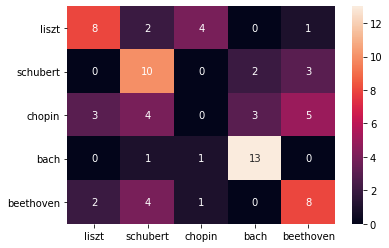

In [24]:
#neural network
clf = MLPClassifier(max_iter=5000,hidden_layer_sizes=200,solver="sgd")
clf.fit(X_train, y_train)
predictions = neigh.predict(X_train)
accuracy = accuracy_score(predictions, y_train)
print(accuracy)

predictions = clf.predict(X_validation)
accuracy = accuracy_score(predictions, y_validation)
print(accuracy)
confusion_matrix(predictions, y_validation)


confused = pd.DataFrame(confusion_matrix(y_validation, predictions), columns=['liszt','schubert','chopin',"bach","beethoven"],index=['liszt','schubert','chopin',"bach","beethoven"])
sns.heatmap(confused, annot=True)


0.84
0.6666666666666666


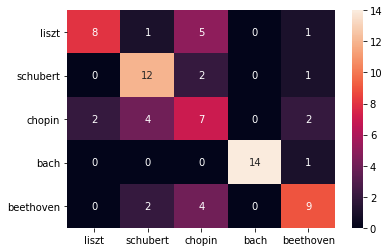

In [27]:
#random forest
random_forest = RandomForestClassifier(max_depth=5, random_state = 1, n_estimators=500, min_samples_leaf=5,criterion="entropy",min_samples_split=2)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_train)
accuracy = accuracy_score(predictions, y_train)
print(accuracy)

predictions = random_forest.predict(X_validation)
accuracy = accuracy_score(predictions, y_validation)
print(accuracy)



confused = pd.DataFrame(confusion_matrix(y_validation, predictions), columns=['liszt','schubert','chopin',"bach","beethoven"],index=['liszt','schubert','chopin',"bach","beethoven"])
sns.heatmap(confused, annot=True)

0.7771428571428571
0.5066666666666667
{'gamma': 'scale'}


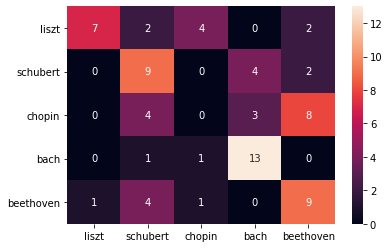

In [28]:
#SVC
svc = SVC(C=10,degree=2,gamma="scale")
svc.fit(X_train, y_train)
predictions = neigh.predict(X_train)
accuracy = accuracy_score(predictions, y_train)
print(accuracy)

predictions = svc.predict(X_validation)
accuracy = accuracy_score(predictions, y_validation)
print(accuracy)


parameters = {"gamma":["scale", "auto"]}
grid_search = GridSearchCV(estimator=svc, param_grid=parameters, cv=5, scoring="precision_micro",refit=False)
grid_search.fit(X_validation,y_validation)
print(grid_search.best_params_)


confused = pd.DataFrame(confusion_matrix(y_validation, predictions), columns=['liszt','schubert','chopin',"bach","beethoven"],index=['liszt','schubert','chopin',"bach","beethoven"])
sns.heatmap(confused, annot=True)


0.7771428571428571
0.5866666666666667
{'var_smoothing': 1e-17}


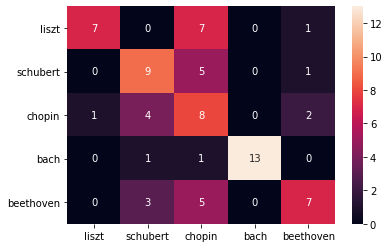

In [29]:
#naive bayes
gaussian = GaussianNB(var_smoothing=0.00000000000000001)
gaussian.fit(X_train, y_train)
predictions = neigh.predict(X_train)
accuracy = accuracy_score(predictions, y_train)
print(accuracy)

predictions_gaus = gaussian.predict(X_validation)
accuracy = accuracy_score(predictions_gaus, y_validation)
print(accuracy)


confused = pd.DataFrame(confusion_matrix(y_validation, predictions_gaus), columns=['liszt','schubert','chopin',"bach","beethoven"],index=['liszt','schubert','chopin',"bach","beethoven"])
sns.heatmap(confused, annot=True)


parameters = {"var_smoothing":[0.00000000000000001,0.000000000000000000001]}
grid_search = GridSearchCV(estimator=gaussian, param_grid=parameters, cv=5, scoring="precision_micro",refit=False)
grid_search.fit(X_validation,y_validation)
print(grid_search.best_params_)


In [34]:
bagging = BaggingClassifier(KNeighborsClassifier())
bagging.fit(X_train,y_train)
predictions = bagging.predict(X_validation)
accuracy = accuracy_score(predictions, y_validation)
print(accuracy)

0.56


0.6842105263157895
{'learning_rate': 0.01, 'min_samples_split': 2, 'n_estimators': 500}


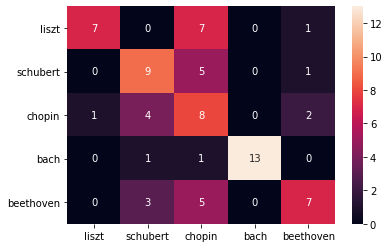

In [39]:
clf = GradientBoostingClassifier(n_estimators=500, learning_rate=0.01, max_depth=1, random_state=0,min_samples_split = 2).fit(X_train, y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(predictions, y_test)
print(accuracy)
confused = pd.DataFrame(confusion_matrix(y_validation, predictions_gaus), columns=['liszt','schubert','chopin',"bach","beethoven"],index=['liszt','schubert','chopin',"bach","beethoven"])
sns.heatmap(confused, annot=True)

parameters = {"learning_rate":[0.1,0.01,0.001], "n_estimators": [100,500], "min_samples_split": [2,5,10]}
grid_search = GridSearchCV(estimator=clf, param_grid=parameters, cv=5, scoring="precision_micro",refit=False)
grid_search.fit(X_validation,y_validation)
print(grid_search.best_params_)